In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

from scipy import stats


In [2]:
# uploading dataset
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')

In [3]:
# remove the articles with 0 words
df = df[df['n_tokens_content']!=0]

# drop the non predictive features
df.drop(labels=['url', 'timedelta'], axis=1, inplace=True)


In [4]:
#drop the highly correlated features

drop1 = [
    'n_non_stop_unique_tokens', 'n_non_stop_words', 'kw_avg_min','self_reference_max_shares', 
    'self_reference_avg_sharess','data_channel_is_entertainment','data_channel_is_world','data_channel_is_tech',
    'kw_max_max','global_rate_negative_words', 'rate_negative_words']

df.drop(drop1, axis=1, inplace=True)

In [5]:
df.shape

(38463, 48)

In [6]:

target = df['shares']

features = df.drop(['shares'], axis=1)

In [7]:
log_y = np.log(target)

In [8]:
# drop the features that aren't correlated with the target variable

drop2 = features.columns[features.corrwith(log_y).abs() < 0.05]
features.drop(drop2, axis=1, inplace=True)

In [9]:
features.shape

(38463, 24)

In [10]:
# feature scaling

scaler = StandardScaler()
features = scaler.fit_transform(features)


# splitting the data into train and test sets


x_train, x_test, y_train, y_test = train_test_split(features, log_y, test_size=0.2, random_state=42)

In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.11420815448570998
Mean Squared Error:  0.7580566988637214
Mean Absolute Error:  0.6483749375290332


In [12]:
#lets check the scores for upscaled data

y_pred_up = np.exp(y_pred)
y_test_up = np.exp(y_test)

print('R2 score for : ', r2_score(y_test_up, y_pred_up))
print('MAE score for : ', mean_absolute_error(y_test_up, y_pred_up))
print('MSE score for : ', mean_squared_error(y_test_up, y_pred_up))

R2 score for :  -0.007039798943141662
MAE score for :  2328.22763448696
MSE score for :  144832329.74924877


In [13]:
reg2 = Ridge(alpha=0.5)
reg2.fit(x_train, y_train)
y_pred = reg2.predict(x_test)
print("Ridge Regression")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))

Ridge Regression
MSE:  0.7580380689412156
R2:  0.11422992361388051
MAE:  0.6481729730364904


In [14]:
#lets check the scores for upscaled data

y_pred_up = np.exp(y_pred)
y_test_up = np.exp(y_test)

print('R2 score for : ', r2_score(y_test_up, y_pred_up))
print('MAE score for : ', mean_absolute_error(y_test_up, y_pred_up))
print('MSE score for : ', mean_squared_error(y_test_up, y_pred_up))

R2 score for :  -0.00708900545580704
MAE score for :  2328.046654110088
MSE score for :  144839406.62334615


In [15]:
reg3 = Lasso(alpha=0.1)
reg3.fit(x_train, y_train)
y_pred = reg3.predict(x_test)
print("Lasso Regression")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Lasso Regression
Mean squared error: 0.82
R2 score: 0.04
Mean absolute error: 0.69


In [16]:
#lets check the scores for upscaled data

y_pred_up = np.exp(y_pred)
y_test_up = np.exp(y_test)

print('R2 score for : ', r2_score(y_test_up, y_pred_up))
print('MAE score for : ', mean_absolute_error(y_test_up, y_pred_up))
print('MSE score for : ', mean_squared_error(y_test_up, y_pred_up))

R2 score for :  -0.014007679286076602
MAE score for :  2379.949695269247
MSE score for :  145834449.3720684


In [17]:
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor(max_depth=4)
reg4.fit(x_train, y_train)
y_pred = reg4.predict(x_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))


R2 score:  0.0928314022980361
MSE:  0.776350827758538
MAE:  0.6594298694988313


In [18]:
#lets check the scores for upscaled data

y_pred_up = np.exp(y_pred)
y_test_up = np.exp(y_test)

print('R2 score for : ', r2_score(y_test_up, y_pred_up))
print('MAE score for : ', mean_absolute_error(y_test_up, y_pred_up))
print('MSE score for : ', mean_squared_error(y_test_up, y_pred_up))

R2 score for :  -0.005716011946290012
MAE score for :  2345.77558156863
MSE score for :  144641942.87968612


In [19]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

reg5 = PolynomialFeatures(degree=2)
x_poly = reg5.fit_transform(x_train)
reg5.fit(x_poly, y_train)
lin_reg_5 = LinearRegression()
lin_reg_5.fit(x_poly, y_train)

# Predicting the Test set results
y_pred = lin_reg_5.predict(reg5.fit_transform(x_test))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.6366141202303816
Mean Squared Error: 0.7436842063992504
R2 Score: 0.1310024610907793


In [20]:
from sklearn.decomposition import PCA

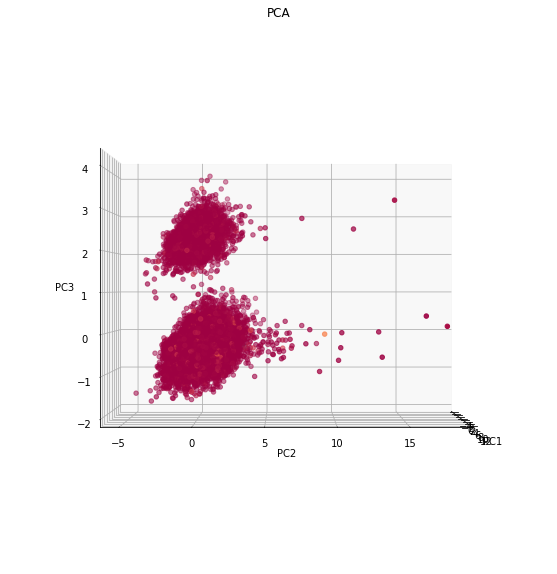

In [89]:
pca = PCA(n_components=3)
pca.fit(features)
X_pca = pca.transform(features)

#standardize the data
scaler = StandardScaler()
scaler.fit(X_pca)
X_pca = scaler.transform(X_pca)


# Plotting the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=target, cmap=plt.cm.Spectral)
ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.view_init(0,0)
plt.show()



The dataset has a bimodal distribution and its better to divide it into two clusters and then build two different models for each cluster.

In [91]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# Create a KMeans object with 2 clusters and save as km
km = KMeans(n_clusters=2, random_state=0,init='k-means++',algorithm='elkan')




In [92]:
km.fit(X_pca)

KMeans(algorithm='elkan', n_clusters=2, random_state=0)

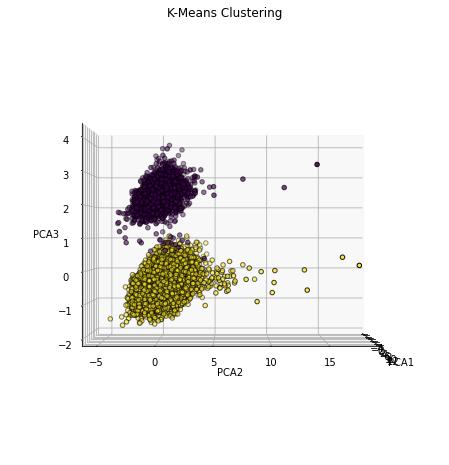

In [94]:
# plot the clusters

labels = km.labels_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('K-Means Clustering')
ax.view_init(0,0)
plt.show()


In [96]:
# split the dat into two different sets by cluster label

x1 = X_pca[labels == 0]
x2 = X_pca[labels == 1]

# get the respective target feature

y1 = log_y[labels == 0]
y2 =log_y[labels == 1]



In [97]:


x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [99]:
reg = Ridge(alpha=0.1)
reg.fit(x2_train, y2_train)
y2_pred = reg.predict(x2_test)
print('R2 score: ', r2_score(y2_test, y2_pred))
print('MSE: ', mean_squared_error(y2_test, y2_pred))
print('MAE: ', mean_absolute_error(y2_test, y2_pred))



R2 score:  0.04084296019464806
MSE:  0.8133901322466639
MAE:  0.6819236355770778


In [107]:
df['shares'][df['weekday_is_saturday'] == 1].count()

2369